# EDA, Customer Segmentation using RFM and KMeans

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

This kernel is EDA and customer segmentation on Online Retail II data set containing all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

pd.set_option("display.max_columns", 50)

**Loading Dataset**

In [2]:
retail_df=pd.read_csv('online_retail_II.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Kích thước dataset
retail_df.shape

(1067371, 8)

# EDA

In [4]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
# Checking for Null values
retail_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Nhận xét

ID khách hàng là tính năng Nhận dạng của chúng tôi và Mô tả có mô tả Sản phẩm.

Chúng tôi không thể thực hiện phân tích RFM và Phân cụm KMeans nếu không có giá trị ID khách hàng.

Do đó, bỏ các giá trị còn thiếu

In [6]:
# Xóa các giá trị trống trong customer id
retail_df.dropna(subset=['Customer ID'],inplace=True)

In [7]:
retail_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**DataSet Summary**

In [8]:
retail_df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


Nhận xét: quan sát các cột Số lượng âm và Giá có min = 0

In [9]:
# Các bản ghi có số lượng âm
retail_df[retail_df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Nhận xét:

**Những hóa đơn này bắt đầu bằng C và theo mô tả dữ liệu, đây là những lần hủy giao dịch do đó loại bỏ các mục này**

In [10]:
# Thay đổi kiểu dữ liệu của Invoice thành str
retail_df['Invoice'] = retail_df['Invoice'].astype('str')

In [11]:
# Lọc các bản ghi với mã hóa đơn hoàn trả
retail_df=retail_df[~retail_df['Invoice'].str.contains('C')]

In [12]:
# Lọc các bản ghi có giá <= 0
retail_df[retail_df['Price']<=0].sort_values('Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
840208,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840207,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840206,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,2011-08-26 14:19:00,0.0,14646.0,Netherlands
823515,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
327801,521375,22202,MILK PAN PINK RETROSPOT,3,2010-09-05 11:58:00,0.0,12647.0,Germany
296375,518231,22472,TV DINNER TRAY DOLLY GIRL,9,2010-08-05 15:28:00,0.0,12471.0,Germany
276858,516304,22690,DOORMAT HOME SWEET HOME BLUE,6,2010-07-19 13:13:00,0.0,14025.0,United Kingdom
400047,527696,22121,NOEL WOODEN BLOCK LETTERS,1,2010-10-18 15:13:00,0.0,13554.0,United Kingdom


Nhận xét:

Chúng tôi quan sát thấy rằng đây không phải là giao dịch mua sản phẩm mà là giao dịch của cửa hàng liên quan đến một số khoản nợ/ sản phẩm đươch tặng kèm, do đó cũng loại bỏ các bút toán này

In [13]:
# Lọc những bản ghi có giá lớn hơn 0
retail_df=retail_df[retail_df['Price']>0]
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


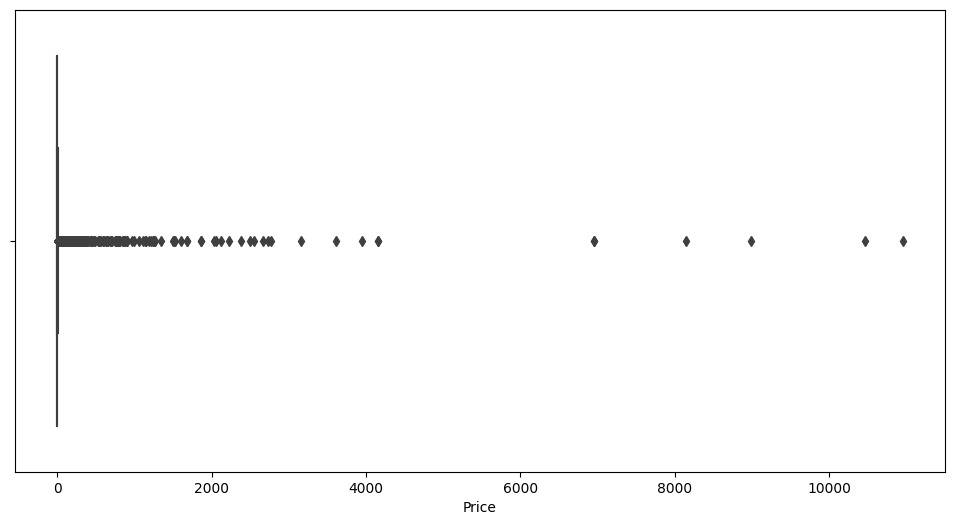

In [14]:
plt.subplots(figsize=(12,6))
sns.boxplot(retail_df.Price)
plt.show()

In [15]:
# Kiểm tra giá trị trùng lặp
retail_df[retail_df.duplicated()].shape


(26124, 8)

In [16]:
retail_df = retail_df.drop_duplicates(keep='first')

In [17]:
retail_df.shape

(779425, 8)

**Dữ liệu của chúng tôi đã giảm, hiện chúng tôi có 779425 điểm dữ liệu**

In [18]:
retail_df.describe()

,Quantity,Price,Customer ID
count,779425.000000,779425.000000,779425.000000
mean,13.489370,3.218488,15320.360461
std,145.855814,29.676140,1695.692775
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15247.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


## Feature Engineering

### InvoiceDate

In [19]:
# Chuyển đổi InvoiceDate thành datetime. InvoiceDate có định dạng 01-12-2010 08:26:33.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

### Doanh thu

In [20]:
# Tạo cột doanh thu
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['Price']

In [21]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [22]:
# số lượng sản phẩm của công ty
retail_df["StockCode"].nunique()

4631

In [23]:
# Tệp khách hàng của công ty
retail_df["Customer ID"].nunique()

5878

# Model Building

In [24]:
# tạo bản sao
rfm_dataframe=retail_df.copy()

## Tính RFM

In [25]:
# Recency = Latest Date - Last Invoice Date, 
# Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total Amount for each customer
import datetime as dt

# Đặt ngày mới nhất 2011-12-11, ngày hóa đơn cuối cùng là 2011-12-10
Latest_Date = dt.datetime(2011,12,11)

# Tạo điểm Mô hình RFM cho từng khách hàng
rfm_dataframe = retail_df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                      'Invoice': lambda x: len(x), 
                                                      'TotalAmount': lambda x: x.sum()})

rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

# Đổi tên cột thành  Recency, Frequency và Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,34,77556.46
1,12347.0,3,222,4921.53
2,12348.0,76,51,2019.40
3,12349.0,19,175,4428.69
4,12350.0,311,17,334.40


**Tóm tắt mô tả và phân phối**

In [26]:
rfm_dataframe[["Recency","Frequency","Monetary"]].describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.866791,132.600374,2955.904095
std,209.353961,342.190092,14440.852688
min,1.000000,1.000000,2.950000
25%,26.000000,20.000000,342.280000
50%,96.000000,52.000000,867.740000
75%,380.000000,138.000000,2248.305000
max,739.000000,12435.000000,580987.040000


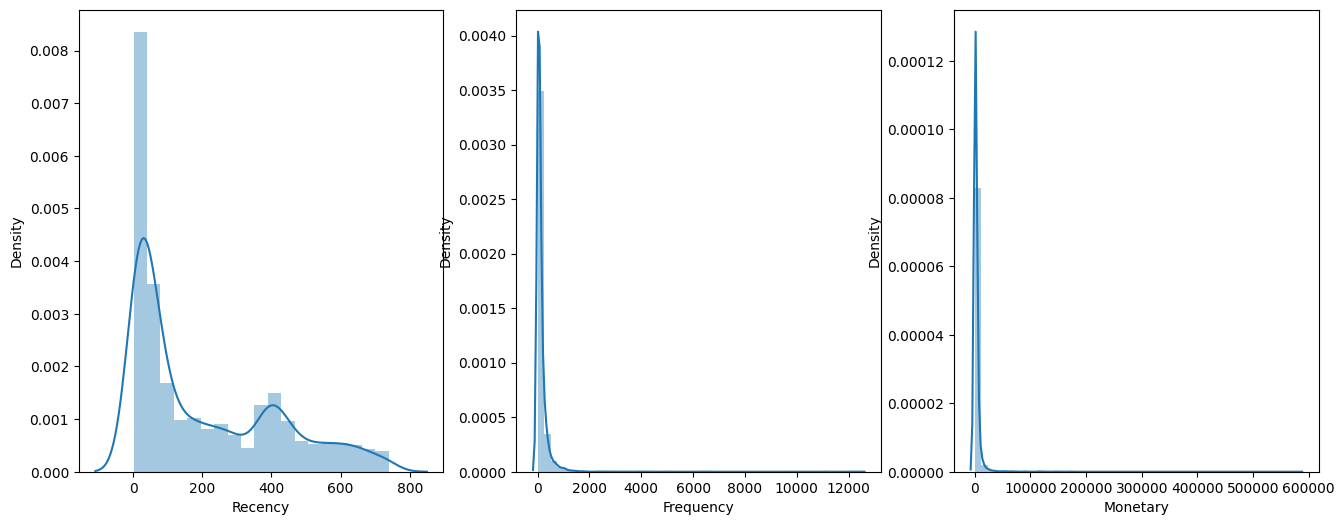

In [27]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(16,6))
sns.distplot(rfm_dataframe['Recency'], ax = ax[0])
sns.distplot(rfm_dataframe['Frequency'], ax = ax[1])
sns.distplot(rfm_dataframe['Monetary'], ax = ax[2])
plt.show()

In [28]:
# transformation dữ liệu 
# Tạo hàm transform dữ liệu
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_dataframe[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_dataframe[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_dataframe[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_dataframe[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
def analyze_skewness1(x):
    print(x)
    print('Độ lệch chuẩn ban đầu:', rfm_dataframe[x].skew().round(2))

    print('Độ lệch chuẩn sau khi tranform bằng:')
    print('Log:',np.log(rfm_dataframe[x]).skew().round(2))
    print('Square root:',np.sqrt(rfm_dataframe[x]).skew().round(2))
    print('Box-Cox:',pd.Series(stats.boxcox(rfm_dataframe[x])[0]).skew().round(2))
    print("-----------")

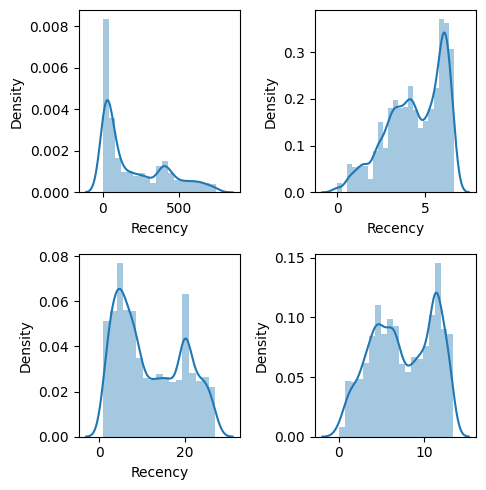

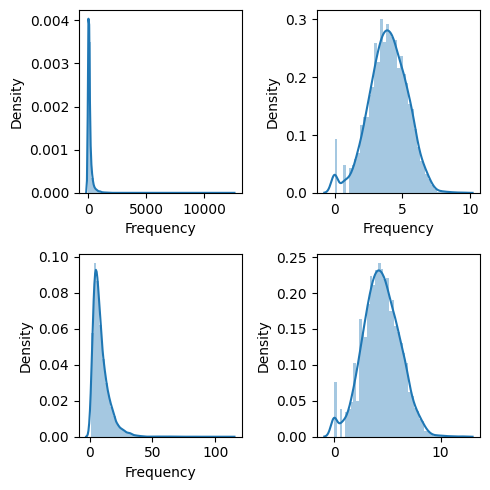

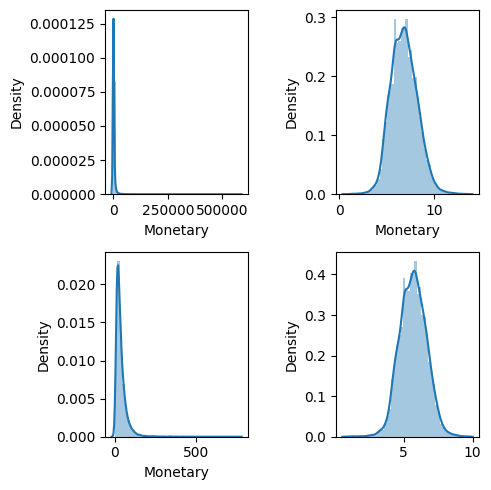

In [29]:
# phân phối với recency
analyze_skewness("Recency")
# phân phối với frequency
analyze_skewness("Frequency")
# Phân phối với Monetary
analyze_skewness("Monetary")


In [30]:
# phân phối với recency
analyze_skewness1("Recency")
# phân phối với frequency
analyze_skewness1("Frequency")
# Phân phối với Monetary
analyze_skewness1("Monetary")

Recency
Độ lệch chuẩn ban đầu: 0.89
Độ lệch chuẩn sau khi tranform bằng:
Log: -0.55
Square root: 0.36
Box-Cox: -0.12
-----------
Frequency
Độ lệch chuẩn ban đầu: 18.16
Độ lệch chuẩn sau khi tranform bằng:
Log: -0.23
Square root: 3.08
Box-Cox: 0.0
-----------
Monetary
Độ lệch chuẩn ban đầu: 25.07
Độ lệch chuẩn sau khi tranform bằng:
Log: 0.25
Square root: 6.03
Box-Cox: -0.01
-----------


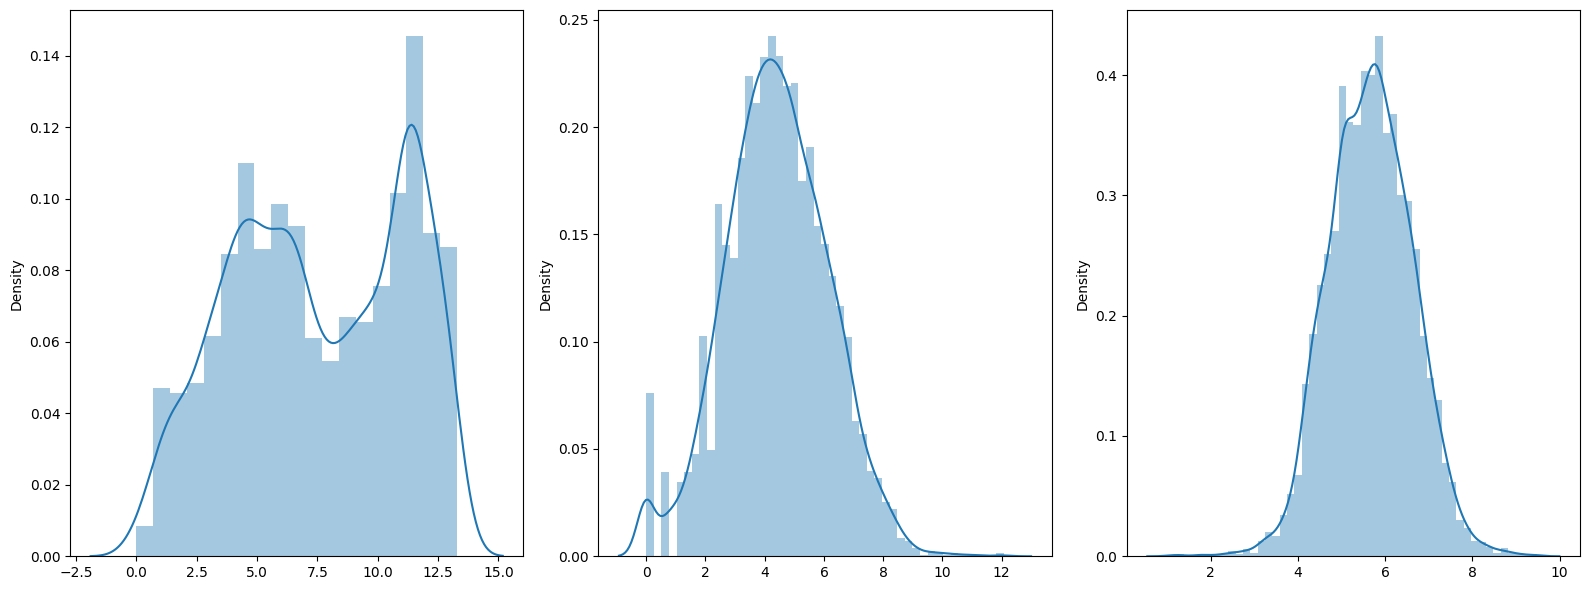

In [31]:
# Tien hanh transform du lieu
rfm_dataframe_t = rfm_dataframe
# rfm_dataframe_t = pd.DataFrame()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
sns.distplot(stats.boxcox(rfm_dataframe_t['Recency'])[0], ax = ax1)
sns.distplot(stats.boxcox(rfm_dataframe_t['Frequency'])[0], ax = ax2)
sns.distplot(stats.boxcox(rfm_dataframe_t['Monetary'])[0], ax = ax3)
plt.tight_layout()
plt.show()
#print("Box-cox Transformation:",pd.Series(stats.boxcox(df["age"])[0]).skew().round(2))

In [32]:

rfm_dataframe_t['Recency_t'] = stats.boxcox(rfm_dataframe['Recency'])[0]
rfm_dataframe_t['Frequency_t'] = stats.boxcox(rfm_dataframe['Frequency'])[0]
rfm_dataframe_t['Monetary_t'] = stats.boxcox(rfm_dataframe['Monetary'])[0]
rfm_dataframe_t.head(10)

,Recency,Frequency,Monetary,Recency_t,Frequency_t,Monetary_t
Customer ID,,,,,,
12346.0,326,34,77556.46,10.600498,3.859165,8.446916
12347.0,3,222,4921.53,1.222839,6.209848,6.824062
12348.0,76,51,2019.40,6.748353,4.348481,6.246242
12349.0,19,175,4428.69,3.956347,5.899364,6.757056
12350.0,311,17,334.40,10.458334,3.045489,4.992073
12351.0,376,21,300.93,11.039068,3.290537,4.914689
12352.0,37,103,2849.84,5.206341,5.220803,6.472960
12353.0,205,24,406.76,9.254834,3.446739,5.134650
12354.0,233,58,1079.40,9.614352,4.505797,5.823050


In [33]:
# data_cl=['Recency_t','Frequency_t','Monetary_t']
# data_cl=rfm_dataframe_t[data_cl]
# data_cl.head(10)

## KMeans Clustering

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# from yellowbrick.cluster import KElbowVisualizer
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.decomposition import PCA


### Applying Elbow Method on Recency, Frequency and Monetary.

In [35]:
# Scale dữ liệu 

# lấy Recency_t, Frequency_t và Monetory_t trong danh sách.
data_cl=['Recency_t','Frequency_t','Monetary_t']
data_cl=rfm_dataframe_t[data_cl].values

# standardising the data
scaler=StandardScaler()
data_cl=scaler.fit_transform(data_cl)
data_cl

array([[ 0.85699504, -0.31293126,  2.89695927],
       [-1.76118185,  1.03688408,  1.20395996],
       [-0.21849712, -0.03195522,  0.60116445],
       ...,
       [ 1.49772351, -1.00885553, -0.52184303],
       [ 1.19120546,  0.16039241,  0.29034779],
       [-0.56397154,  0.76846357,  1.09607926]])

In [36]:
data_cl = pd.DataFrame(data_cl)
data_cl.head()

,0,1,2
0,0.856995,-0.312931,2.896959
1,-1.761182,1.036884,1.203960
2,-0.218497,-0.031955,0.601164
3,-0.998006,0.858597,1.134058
4,0.817304,-0.780162,-0.707214


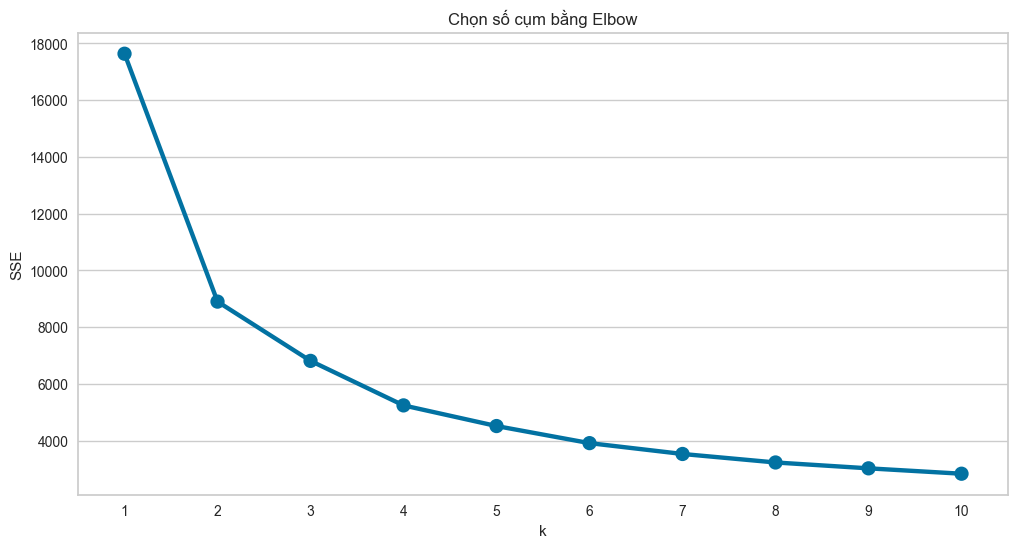

In [37]:
# Chọn số cụm bằng Elbow
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(data_cl)
    sse[k] = kmeans.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Chọn số cụm bằng Elbow')
plt.show()

**Silhouette Score**

In [38]:
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_cl)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_cl, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41188606476447986)
For n_clusters = 3, silhouette score is 0.3142192766863422)
For n_clusters = 4, silhouette score is 0.33801984686948316)
For n_clusters = 5, silhouette score is 0.3108186949572416)
For n_clusters = 6, silhouette score is 0.29828757940010275)
For n_clusters = 7, silhouette score is 0.2869497412980429)
For n_clusters = 8, silhouette score is 0.2802624190791114)
For n_clusters = 9, silhouette score is 0.27271936097417565)
For n_clusters = 10, silhouette score is 0.25718196078639993)


In [39]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_cl)


KMeans(n_clusters=4, random_state=42)

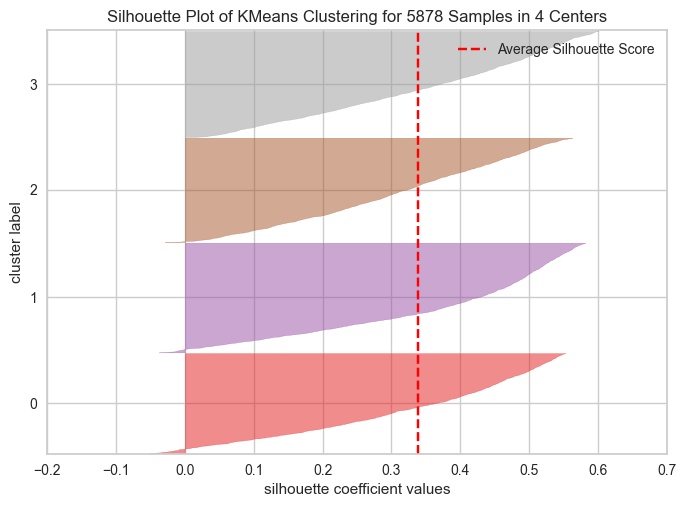

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5878 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:

visualizer = SilhouetteVisualizer(model)
visualizer. fit(data_cl)
visualizer.poof()

In [41]:
cl_kmeans= model.predict(data_cl)

In [42]:
# Tìm cụm cho các quan sát trong data
data_cl['Cluster'] = model.labels_
data_cl.head()

,0,1,2,Cluster
0,0.856995,-0.312931,2.896959,3
1,-1.761182,1.036884,1.203960,1
2,-0.218497,-0.031955,0.601164,2
3,-0.998006,0.858597,1.134058,1
4,0.817304,-0.780162,-0.707214,0


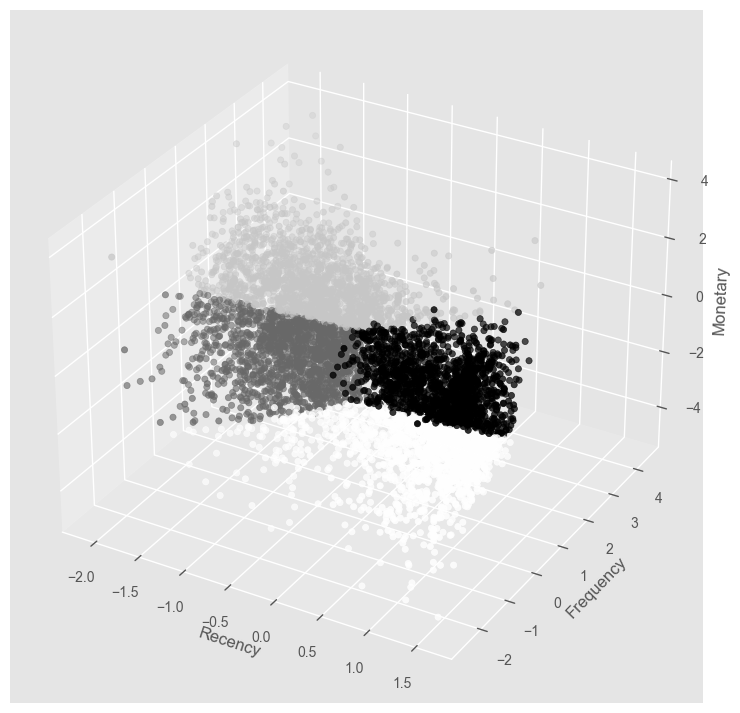

In [43]:
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
ax =  plt.figure(figsize = (9,9)).add_subplot(projection = '3d')

x = data_cl[0]
y = data_cl[1]
z = data_cl[2]


ax.scatter(x, y, z, c = data_cl.Cluster)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

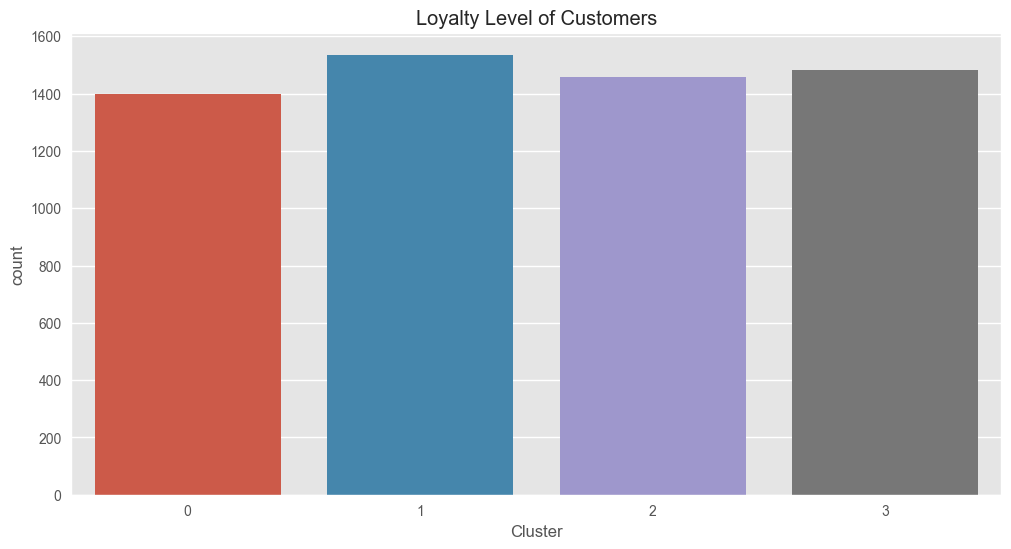

In [49]:
# Biểu đồ số lượng khách hàng trong các phân loại mức độ trung thành

plt.figure(figsize=(12,6))
sns.countplot(data_cl['Cluster'])
plt.title('Loyalty Level of Customers')
plt.show()

In [44]:
rfm_dataframe_t['Cluster'] = model.labels_
rfm_dataframe_t.head()

,Recency,Frequency,Monetary,Recency_t,Frequency_t,Monetary_t,Cluster
Customer ID,,,,,,,
12346.0,326,34,77556.46,10.600498,3.859165,8.446916,3
12347.0,3,222,4921.53,1.222839,6.209848,6.824062,1
12348.0,76,51,2019.40,6.748353,4.348481,6.246242,2
12349.0,19,175,4428.69,3.956347,5.899364,6.757056,1
12350.0,311,17,334.40,10.458334,3.045489,4.992073,0


In [45]:
rfm_dataframe_t['Cluster'].value_counts()

1    1536
3    1484
2    1459
0    1399
Name: Cluster, dtype: int64

In [46]:
rfm_dataframe_t.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,409.93,13.47,234.73
1,37.09,374.67,8859.32
2,40.39,51.85,884.51
3,335.02,73.74,1447.44


In [47]:
rfm_dataframe_cl = rfm_dataframe_t[['Recency','Frequency','Monetary','Cluster']]
rfm_dataframe_cl

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,326,34,77556.46,3
12347.0,3,222,4921.53,1
12348.0,76,51,2019.40,2
12349.0,19,175,4428.69,1
12350.0,311,17,334.40,0
...,...,...,...,...
18283.0,4,938,2664.90,1
18284.0,432,28,461.68,3
18285.0,661,12,427.00,0
